# ESE 523: Bloch Sphere for Homework 2

In [246]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [247]:
N=2
up = basis(N,0)
dn = basis(N,1)

psi1 = up 
psi2 = (up+dn)/np.sqrt(2) #+,X eigenstate
psi3 = (up+1j*dn).unit() #+,Y eigenstate

In [248]:
def show_bloch(expect):
    sphere = Bloch()
    sphere.add_points(expect,meth='l')
    sphere.show()

In [249]:
def calc_evol(psi):
    tlist = np.linspace(0.0,np.pi/4,100)
    tlist2 = np.linspace(0.0,np.pi/2,100)
    x = []
    y = []
    z = []
    
    result = mesolve(sigmax(),psi,tlist,[],[sigmax(),sigmay(),sigmaz()])
    x.extend(result.expect[0])
    y.extend(result.expect[1])
    z.extend(result.expect[2])
    result = mesolve(sigmax(),psi,tlist,[],[])
    
    psi = result.states[-1]
    result = mesolve(sigmay(),psi,tlist2,[],[sigmax(),sigmay(),sigmaz()])
    x.extend(result.expect[0])
    y.extend(result.expect[1])
    z.extend(result.expect[2])
    result = mesolve(sigmay(),psi,tlist2,[],[])
    
    psi = result.states[-1]
    result = mesolve(-sigmax(),psi,tlist,[],[sigmax(),sigmay(),sigmaz()])
    x.extend(result.expect[0])
    y.extend(result.expect[1])
    z.extend(result.expect[2])
    result = mesolve(sigmax(),psi,tlist,[],[])
    
    expect = [x,y,z]
    
    show_bloch(expect)

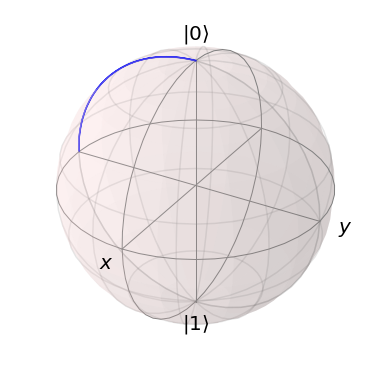

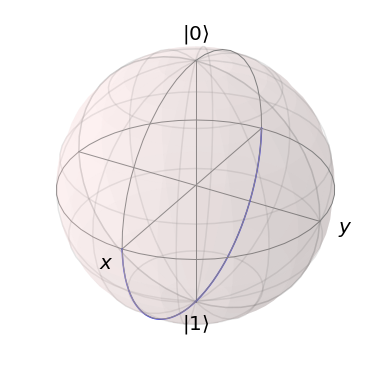

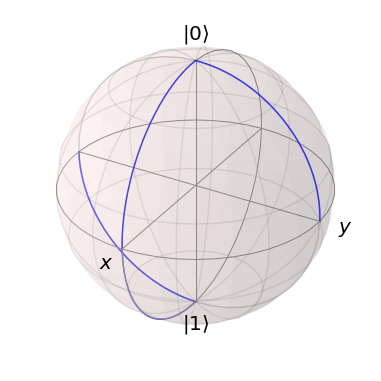

In [250]:
calc_evol(psi1)
calc_evol(psi2)
calc_evol(psi3)